In [6]:
from pathlib import Path
import numpy as np 
import xarray as xr 
import pandas as pd

import sys
sys.path.append("/home/tommy/neuralhydrology")
from scripts.read_nh_results import (
    get_test_filepath,
    get_all_station_ds,
    calculate_all_error_metrics,
    get_ensemble_path,
)

from scripts.read_model import (get_model, _load_weights)
from neuralhydrology.utils.config import Config

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_dir = Path("/datadrive/data")
nh_dir = Path("/home/tommy/neuralhydrology")

In [33]:
def read_basin_list(txt_path: Path) -> pd.DataFrame:
    return pd.read_csv(txt_path, header=None).rename({0: "station_id"}, axis=1)

all_fpath = nh_dir / "data/camels_gb_basin_list.txt"
all_sids = read_basin_list(all_fpath)
all_sids.head()

,station_id
0,1001
1,2001
2,2002
3,3003
4,4001


In [34]:
from sklearn.model_selection import train_test_split
SEED = 100
np.random.seed(SEED)


def write_basins_txt_file(sids: pd.DataFrame, txt_filepath: Path):
    assert "station_id" in sids.columns, f"Expected station_id in columns. Got: {sids.columns}"
    with open(txt_filepath, 'w') as f:
        for ix, item in sids.iterrows():
            f.write("%s\n" % int(item))


train_basin_file = (nh_dir / "data/camels_gb_TRAIN.txt")
test_basin_file = (nh_dir / "data/camels_gb_TEST.txt")
cond1 = train_basin_file.exists()
cond2 = test_basin_file.exists()

if (not cond1) or (not cond2):
    train_sids, test_sids = train_test_split(all_sids, test_size=0.2)
    write_basins_txt_file(train_sids, train_basin_file)
    write_basins_txt_file(test_sids, test_basin_file)
else:
    train_sids = read_basin_list(train_basin_file)
    test_sids = read_basin_list(test_basin_file)

# Where are these basins?

In [37]:
import geopandas as gpd
from scripts.geospatial import initialise_gb_spatial_plot, load_latlon_points
from mpl_toolkits.axes_grid1 import make_axes_locatable

st_data_dir = Path("/home/tommy/spatio_temporal/data")
points = load_latlon_points(st_data_dir)
static = xr.open_dataset(st_data_dir / "camels_static.nc")

In [43]:
train_gdf = gpd.GeoDataFrame(train_sids.set_index("station_id").join(points))
test_gdf = gpd.GeoDataFrame(test_sids.set_index("station_id").join(points))

<AxesSubplot:>

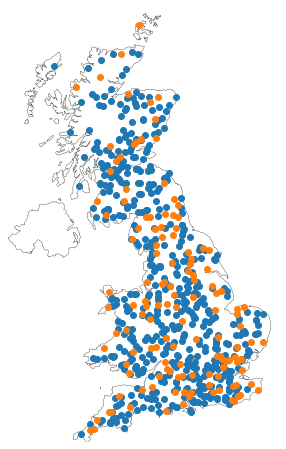

In [47]:
ax = initialise_gb_spatial_plot()
train_gdf.plot(ax=ax, color="C0", label="Train")
test_gdf.plot(ax=ax, color="C1", label="Test")

In [48]:
print(len(train_sids))
print(len(test_sids))

535
134
